In [1]:
import json
import csv
#with open('/Users/mjdioli/Documents/STK-IN5000/ml-society-science/src/project-2/final_analysis.json') as json_file:
    #data = json.load(json_file)
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt

from TestRecommender import fixed_treatments, final_full_analysis, test_exploration

In [2]:
return_dict = fixed_treatments(n_tests=10000)

100%|██████████| 129/129 [04:33<00:00,  2.12s/it]


In [3]:

counter = 1
for key, value in return_dict.items():
    sum_val = sum(value[0])
    mean_val  = sum(value[0])/len(value[0])
    print(key, mean_val)

fixed_policy_0 0.0121
fixed_policy_1 0.43250000000004085
fixed_policy_2 0.48779999999999374
fixed_policy_3 -0.08710000000001476
fixed_policy_4 -0.0836000000000147
fixed_policy_5 -0.08920000000001499
fixed_policy_6 -0.08090000000001411
fixed_policy_7 -0.08460000000001477
fixed_policy_8 -0.08660000000001492
fixed_policy_9 -0.08260000000001425
fixed_policy_10 -0.08570000000001492
fixed_policy_11 -0.027099999999998063
fixed_policy_12 -0.08290000000001455
fixed_policy_13 -0.08200000000001467
fixed_policy_14 -0.08090000000001468
fixed_policy_15 -0.08470000000001489
fixed_policy_16 -0.06810000000001244
fixed_policy_17 -0.08760000000001494
fixed_policy_18 -0.08200000000001448
fixed_policy_19 -0.08790000000001495
fixed_policy_20 -0.08120000000001391
fixed_policy_21 -0.07020000000001324
fixed_policy_22 -0.08380000000001488
fixed_policy_23 -0.08840000000001497
fixed_policy_24 -0.07300000000001287
fixed_policy_25 -0.08590000000001455
fixed_policy_26 -0.08580000000001461
fixed_policy_27 -0.08560000

In [4]:
sorted_sum = {k: sum(v[0])/len(v[0]) for k, v in sorted(return_dict.items(), key=lambda item: item[1])}
sorted_sum = {k: v for k, v in sorted(sorted_sum.items(), key=lambda item: item[1], reverse=True)}

In [5]:
for key, value in sorted_sum.items():
    print(key, value)

fixed_policy_2 0.48779999999999374
fixed_policy_1 0.43250000000004085
fixed_policy_0 0.0121
fixed_policy_11 -0.027099999999998063
fixed_policy_28 -0.05680000000001178
fixed_policy_96 -0.05760000000001097
fixed_policy_39 -0.05940000000001129
fixed_policy_54 -0.06140000000001178
fixed_policy_73 -0.06220000000001228
fixed_policy_103 -0.06520000000001251
fixed_policy_16 -0.06810000000001244
fixed_policy_115 -0.06810000000001264
fixed_policy_127 -0.06900000000001207
fixed_policy_21 -0.07020000000001324
fixed_policy_24 -0.07300000000001287
fixed_policy_66 -0.0753000000000132
fixed_policy_97 -0.07540000000001365
fixed_policy_110 -0.07590000000001362
fixed_policy_87 -0.07590000000001398
fixed_policy_68 -0.07630000000001372
fixed_policy_89 -0.07660000000001373
fixed_policy_111 -0.07680000000001333
fixed_policy_75 -0.07690000000001444
fixed_policy_72 -0.07780000000001372
fixed_policy_117 -0.07860000000001398
fixed_policy_53 -0.07890000000001404
fixed_policy_81 -0.07920000000001416
fixed_policy_5

Action:  fixed_policy_102
large utility:  4877.999999999937 fixed_policy_102


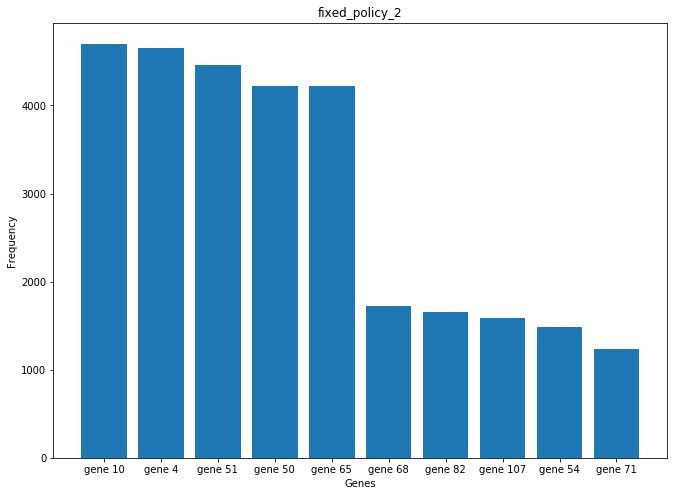

Action:  fixed_policy_102
large utility:  4325.000000000408 fixed_policy_102


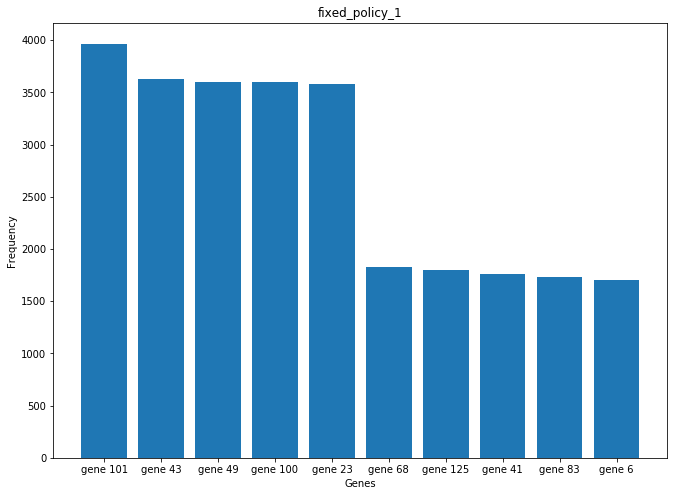

Action:  fixed_policy_102


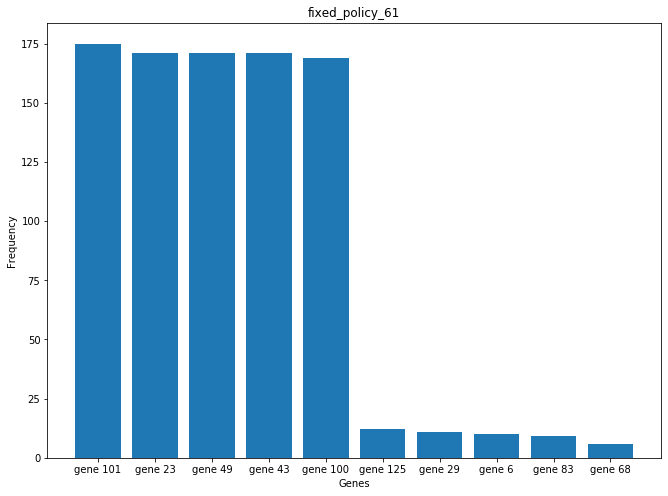

In [6]:
for ind, (k,v) in enumerate(sorted_sum.items()):
    if ind == 0 or ind ==50 or ind ==1:
        value = return_dict[k]
        sum_val = sum(value[0])
        mean_val  = sum(value[0])/len(value[0])
        covars = value[1]
        covars = covars.loc[covars["y"]==1.0]
        s = covars.sum()
        covars = covars[s.sort_values(ascending=False).index]
        covars.drop(["sex", "smoker", "y", "symptom 1", "symptom 2"], axis=1, inplace=True)
        covars.head()
        top5 = covars.iloc[:,:5]
        bot5 = covars.iloc[:,-5:]
        top5.head()
        print("Action: ", key)
        #print("Sum of utilities: ", sum_val )
        if sum_val>500:
            print("large utility: ", sum_val, key)
        #print("Mean of utilities: ", mean_val )
        #print(list(top5.index)+list(bot5.index))
        fig = plt.gcf()
        fig.set_size_inches(11,8)
        plt.bar(list(top5.columns)+list(bot5.columns), list(top5.sum())+list(bot5.sum()))
        plt.title(k)
        plt.xlabel("Genes")
        plt.ylabel("Frequency")
        plt.show()
        fig.savefig("./img/gene_frequency"+k+".png")


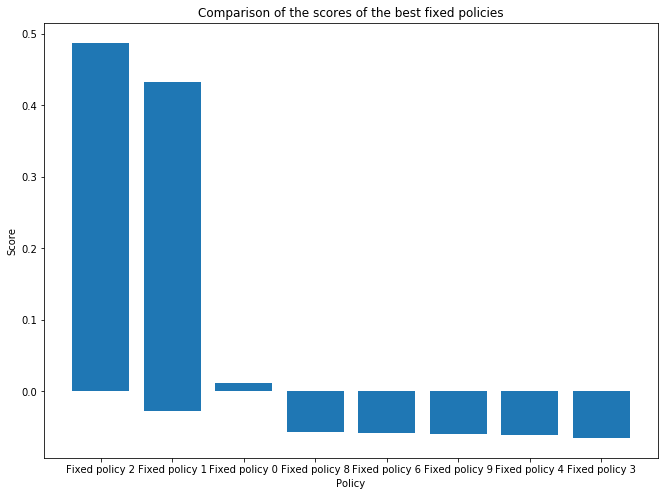

In [8]:
scores = []
models = []
for ind, (k,v) in enumerate(sorted_sum.items()):
    if ind<10:
        model = "Fixed policy " + k[-1]
        mean_val = v
        models += [model]
        scores += [mean_val]
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.bar(models, scores)
plt.title("Comparison of the scores of the best fixed policies")
plt.xlabel("Policy")
plt.ylabel("Score")
plt.show()
fig.savefig("./img/fixed_scores.png")